# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
# импортируем библиотеку pandas и прочитаем файл с данными
data.info()
# рассмотрим общую информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [2]:
data.head(60)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.
В таблицу вписаны два вида данных, одни пользователем, вторые — получены автоматически на основе картографических данных, поэтому много пропусков, например, расстояние до центра, аэропорта, ближайшего парка и водоёма.Каждая строка таблицы содержит уникальную информацию;
-total_area общая площадь квартиры- значения полные, что позволит заполнить пропуски в других данных,
- rooms - число комнат, также полные данные, 
-ceiling_height высота потолков, есть пропуски, возможно данные забивались вручную, поскольку есть выбивающиеся данные как 27 м высота потолка вместь 2,7
- days_exposition сколько дней продавалась квартира- также много пропусков- возможно связаны с тем что данные были внесены нечитаемо
а также стоимость и другие показатели. Однако много некорректных данных: -Общее колличество значений данных 23699, каждый обьект описывается 22 признаками.

### Шаг 2. Предобработка данных

In [3]:
#рассмотрим пропуски в столбцах
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
# под апартаментами скрываются нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания, заменим их на false
data['is_apartment'] = data['is_apartment'].fillna('False')

In [5]:
# вероятнее всего если пропуск в столбце балконов то его попросту нет
data['balcony'] = data['balcony'].fillna(0)

In [6]:
# группируем таблицу по этажности домов, для каждой  о находим среднюю высоту потолков
ceiling_medians = data.pivot_table(index='floors_total', values='ceiling_height', aggfunc=['median','count'])

In [7]:
ceiling_medians.columns = ['median', 'count']
ceiling_medians

,median,count
floors_total,,
1.0,2.80,10
2.0,2.70,215
3.0,2.80,399
4.0,3.00,789
5.0,2.55,3666
6.0,3.00,619
7.0,3.00,398
8.0,2.80,220
9.0,2.55,2557


In [8]:
#заменяем на медиану пропущенные значения потолков для отсутствующмх значений этажности дома
for floor in ceiling_medians.index:
    data.loc[(data['floors_total'].isna()) |
             ((data['floors_total'] == floor) & (ceiling_medians.loc[floor, 'count'] == 0)), 'ceiling_height'] = data['ceiling_height'].describe()[5]

In [9]:
#заменяем на медиану пропущенные значения потолков для домов с соответствующей этажностью
for floor in ceiling_medians.index:
    data.loc[(data['ceiling_height'].isna()) & ((data['floors_total'] == floor)), 'ceiling_height'] = ceiling_medians.loc[floor,'median'] 

In [10]:
data.loc[data['locality_name'].isna()].describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,49.000000,4.900000e+01,49.000000,49.000000,49.000000,48.000000,44.000000,49.000000,40.000000,49.000000,41.000000,41.000000,41.000000,15.000000,41.000000,25.000000,48.000000
mean,8.000000,6.745167e+06,69.799796,2.326531,2.818776,9.666667,39.152727,5.448980,12.389500,0.285714,24572.341463,11278.902439,0.536585,476.733333,1.024390,489.280000,238.645833
std,5.552777,4.496722e+06,30.575956,0.944011,0.275950,7.677913,17.694664,5.784538,7.497993,0.707107,8461.691597,8910.058254,0.839570,179.158137,1.083693,232.420151,190.620542
min,0.000000,1.750000e+06,29.400000,1.000000,2.550000,2.000000,13.000000,1.000000,5.000000,0.000000,10556.000000,1322.000000,0.000000,67.000000,0.000000,142.000000,4.000000
25%,3.000000,3.950000e+06,46.500000,2.000000,2.600000,5.000000,27.550000,2.000000,8.200000,0.000000,21654.000000,4383.000000,0.000000,374.500000,0.000000,374.000000,83.250000
50%,7.000000,5.130593e+06,63.000000,2.000000,2.750000,6.000000,35.900000,3.000000,10.200000,0.000000,22041.000000,8943.000000,0.000000,472.000000,1.000000,374.000000,211.000000
75%,10.000000,8.000000e+06,83.000000,3.000000,3.000000,11.250000,51.100000,6.000000,12.250000,0.000000,25771.000000,17369.000000,1.000000,591.500000,1.000000,603.000000,331.250000
max,20.000000,2.400000e+07,178.300000,4.000000,4.000000,24.000000,94.000000,23.000000,41.600000,4.000000,60195.000000,41294.000000,3.000000,740.000000,3.000000,953.000000,869.000000


In [11]:
# максимальное удаление аэропорта для Санкт-Петербурга
max_sp_aer = data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].max()

In [12]:
#определим, что считать Санкт-Петербургом, а что Ленобластью по значениям расстояния до аэропорта

data.loc[(data['locality_name'].isna()) & (data['airports_nearest'] <= max_sp_aer), 'locality_name'] = "Санкт-Петербург"
data.loc[(data['locality_name'].isna()) & (data['airports_nearest'] > max_sp_aer), 'locality_name'] = "Ленинградская Область"

In [13]:
#проверим сколько пропусков осталось в таблице
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area              1903
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2278
balcony                     0
locality_name               8
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [14]:
#в связи с большим количеством пропусков невозможно по удаленности аэропорта возместить все пропуски в названии населенного пункта поэтому удаляем незаменяемые значения в locality_name               
data.dropna(subset=['locality_name'], inplace = True)

In [15]:
#категоризуем все данные по городу и области
def group(row):
    group = row['locality_name']
    if group == 'Санкт-Петербург':
        return 'Санкт-Петербург'
   
    else: 
        return 'Ленинградская Область'
data['locality_name_new'] = data.apply(group, axis=1)

In [16]:
#заменяем пропуски в столбце удаленности от центра на медиану по удаленности от города или области
data['cityCenters_nearest'] = data.groupby('locality_name_new')['cityCenters_nearest'].apply(lambda x: x.fillna(x.median()))

In [17]:
#заменяем пропуски в столбце удаленности от центра на медиану по удаленности от города или области
data['airports_nearest'] = data.groupby('locality_name_new')['airports_nearest'].apply(lambda x: x.fillna(x.median()))

In [18]:
#заполняем пропуски в площади кухни на значение медианы в зависимости от колличества комнат в квартире
data['kitchen_area'] = data.groupby('rooms')['kitchen_area'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [19]:
#заполняем пропуски в жилой площади на значение медианы в зависимости от колличества комнат в квартире
data['living_area'] = data.groupby('rooms')['living_area'].transform(lambda x: x.fillna(x.median()))

In [20]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5510
parks_nearest           15612
ponds_around3000         5510
ponds_nearest           14581
days_exposition          3180
locality_name_new           0
dtype: int64

In [21]:
#меняем пропуски на медиану
#data.loc[data['days_exposition'].isna(), 'days_exposition'] = data['days_exposition'].describe()[5]

In [22]:
#заменим тип данных даты публикации
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [23]:
last_day = data['first_day_exposition'].max()

In [24]:
zero_days_exposition = last_day - data['first_day_exposition']

In [25]:
data['days_exposition'] = data['days_exposition'].fillna(0).replace(0, zero_days_exposition.dt.days)

В столбце длительность размещения пропуск, и это скорей ошибка системы, так как она не смогла рассчитать дату, или же была некоторая проблема с самой датой.  В имеющихся данных большой разброс значений, стандартное отклонение больше среднего, а медиана и среднее далеки друг от друга.заполнив пропуски высчитав разницу между максимальным днем размещения и датой публикации мы находим насколько максимально могло быть размещено данное объявление о продаже.

In [26]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total               86
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5510
parks_nearest           15612
ponds_around3000         5510
ponds_nearest           14581
days_exposition             0
locality_name_new           0
dtype: int64

In [27]:
#в связи с малым колличеством пропусков а также с невозможностью по данным в таблице восстановить пропущенные значения в столбце этажность дома, удалим пропущенные строки
data.dropna(subset=['floors_total'], inplace = True)

In [28]:
data['locality_name'] = data['locality_name'].str.lower() 
#приводим все значения к одному регистру

In [29]:
#заменим тип данных даты публикации
#data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [30]:
#смотрим успешность замены всех пропусков
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              194
balcony                     0
locality_name               0
airports_nearest            0
cityCenters_nearest         0
parks_around3000         5500
parks_nearest           15560
ponds_around3000         5500
ponds_nearest           14544
days_exposition             0
locality_name_new           0
dtype: int64

In [31]:
data.duplicated().sum()
# считаем количество дубликатов в наборе данных

0

На этапе предобработки в данных обнаружились пропуски в столбцах от тех, что нам необходимы мы успешно избавились. 
удаление строк с пропусками не позволит нам провести точный анализ поэтому :
-балконы: скорее всего пропуски означают отсутствие балконов в квартире, поэтому заменили пропуски на нули
- Наименование населенного пункта заменили исходя из удаленности к аэропорту. в Санкт-Петербурге 1 аэропорт, значит сравниваем с максимальным удалением известным в таблице и сортируем на город и область
- высота потолков; высока вероятность ввода вручную данных поскольку есть двузначные числа, поэтому задаем условие что высота потолков не ниже 2,5 и меняем на медиану конкретной этажности
- жилая площадь и площадь кухни заменили исходя из колличества комнат в квартире на медианное значение
-колличество этажей в доме невозможно определить и пропущенных значений не так много, поэтому все строки с пропущенными значениями удалили
-расстояние до аэропорта и центра города(предполагается что центр города СПБ) заменили на среднее исходя из наименования населенного пункта
- длительность размещения все пропущенные значения заменили на медиану
Поскольку другие сведения таблицы для нас не так важны  мы не удаляем все пропущенные значения, аоставляем в первоначальном виде.

### Шаг 3. Посчитайте и добавьте в таблицу

In [32]:
#добавим в таблицу столбец цены за кв метр
data['for_metr'] = round(data['last_price'] / data['total_area'])

In [33]:
#добавим в таблицу столбец в какой день недели разместили обьявление
data['weekday'] = data['first_day_exposition'].dt.weekday

In [34]:
#добавим в таблицу столбец в какой месяц разместили обьявление
data['month'] = data['first_day_exposition'].dt.month

In [35]:
#добавим в таблицу столбец год размещения обьявления
data['year'] = data['first_day_exposition'].dt.year

In [36]:
#категоризуем этажи для последующего анализа
def floor_category(floor):
    if floor['floor'] == floor['floors_total']:
        return 'последний'
    elif floor['floor'] == 1:
        return 'первый'
    else:
        return 'другие'
data['floor_category'] = data.apply(floor_category, axis=1)


In [37]:
#соотношение жилой площади к общей
data['living_to_total'] = round(data['living_area'] / data['total_area'])

In [38]:
#соотношение площади кухни к общей площади
data['kitchen_to_total'] = round(data['kitchen_area'] / data['total_area'])

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

total_area


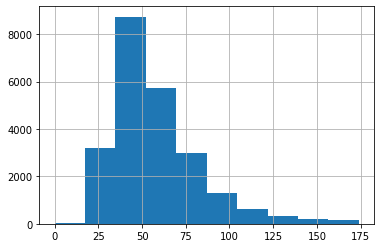

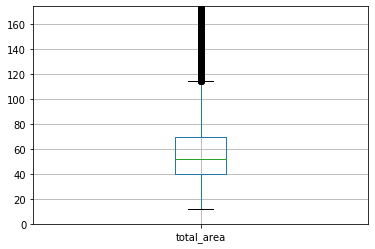

None
last_price


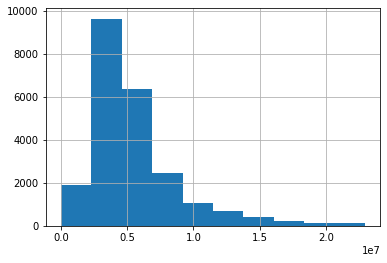

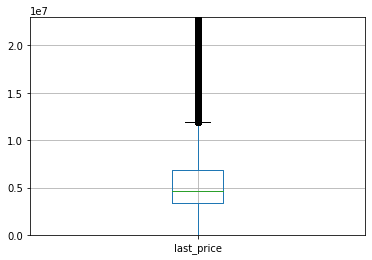

None
rooms


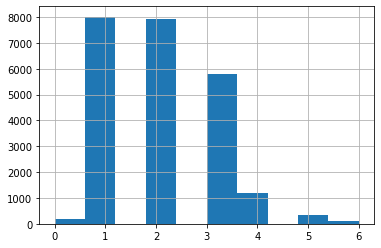

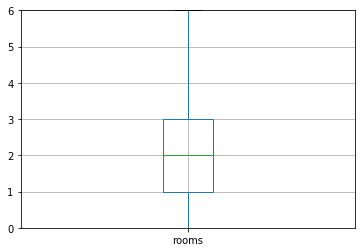

None
ceiling_height


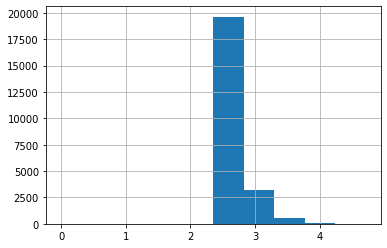

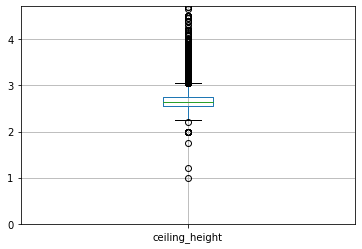

None


In [39]:
#рассмотрим параметры: площадь, цена, число комнат, высота потолков. строим гистограммы и диаграммы  для каждого параметра

list = ['total_area', 'last_price', 'rooms', 'ceiling_height']  # создаем список
for item in list:
    def analyze(item):
              print (item)
              percentile_95 = np.percentile(data[item], 95)
              data[item].hist(range = (0, percentile_95*1.5))
              plt.show()
              plt.ylim(0, percentile_95*1.5)
              data.boxplot(column = item)
              plt.show()
              data[item].describe()
    print(analyze(item))


Изучите следующие параметры: площадь, цена, число комнат, высота потолков
средняя квартира выставленная на продажу имеет площадь 52 кв м
средняя цена квартир в обьявлениях 4,7 млн
колличество комнат в среднем 2
высота потолка 2,7

In [40]:
#рассмотрим характеристики выборки столбца дней продаж и присвоим ей переменную d_e
d_e = data['days_exposition'].describe()

In [41]:
data['days_exposition'].describe()

count    23605.000000
mean       185.893582
std        233.454748
min          0.000000
25%         43.000000
50%         94.000000
75%        237.000000
max       1618.000000
Name: days_exposition, dtype: float64

In [42]:
data['days_exposition'].median()

94.0

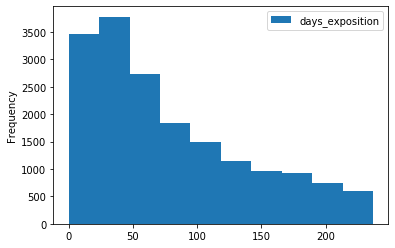

In [44]:
#построим гистограмму столбца время продажи квартиры
data.plot(y='days_exposition', kind='hist', range=(0, d_e[6]), bins=10)


Исходя из гистограммы можно сделать вывод что большая часть продаж квартир приходится на первые полтора месяца после подачи объявления

(0, 1618.0)

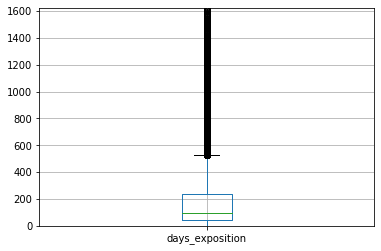

In [45]:
#найдем медиану на диаграмме размаха
data.boxplot('days_exposition')
plt.ylim(0, d_e[7])

 Опишите, сколько обычно занимает продажа:
в среднем квартира продается 50 дней, чуть более 1 месяца

In [46]:
#функция получающая на вход название столбца и возвращающая значения усов чтоб Убрать редкие и выбивающиеся значения
def qad(row):
    min_qad=0
    mak_kad=0
    stat = data[row].describe()
    #межквартильный размах
    iqr = stat[6]-stat[4]
    #левый ус
    min_qad = round(stat[4]-1.5*iqr, 2)
    #правый ус
    mak_qad = round(stat[6]+1.5*iqr, 2)
    if min_qad < stat[3]:
        min_qad = stat[3]
    if mak_qad > stat[7]:
        mak_qad = stat[7]    
    return [min_qad, mak_qad]


In [47]:
qad('total_area')

[12.0, 114.38]

In [48]:
qad('last_price')

[12190.0, 11897500.0]

In [49]:
qad('rooms')

[0.0, 6.0]

In [50]:
qad('ceiling_height')

[2.25, 3.05]

In [51]:
qad('days_exposition')

[0.0, 528.0]

 редкие и выбивающиеся значения:
 общая площадь больше 114 кв м или меньше 12 кв м
 цена меньше 1 млн 200 и больше 11 млн 800
 колличество комнат более 6
 высота потолка менее 2.25 и более 3.05
 время продажи более 528 дней

In [52]:
#добавим столбцы включающие аномальные значения таблицы
data['too_total_area'] = data['total_area'] > qad('total_area')[1]
data['too_last_price'] = data['last_price'] > qad('last_price')[1]
data['too_rooms'] = data['rooms'] > qad('rooms')[1]
data['too_ceiling_height'] = (data['ceiling_height'] > qad('ceiling_height')[1]) | (data['ceiling_height'] < qad('ceiling_height')[0])
data['fast_days_exposition'] = data['days_exposition'] > qad('days_exposition')[1] 
data['slow_days_exposition'] = data['days_exposition'] < 30 

In [53]:
#убираем редкие и выбивающиеся значения
good_data = data[(data['too_total_area'] == False) & (data['too_last_price'] == False) & (data['too_rooms'] == False) & (data['too_ceiling_height'] == False) & (data['fast_days_exposition'] == False) & (data['slow_days_exposition'] == False)].reset_index(drop=True)

0.6463657264457567


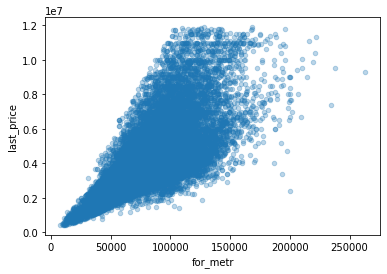

In [54]:
#рассмотрим  зависимость  цены от квадратного метра
good_data.plot(x='for_metr', y='last_price', kind='scatter', alpha=0.3)


print(good_data['for_metr'].corr(good_data['last_price'])) 

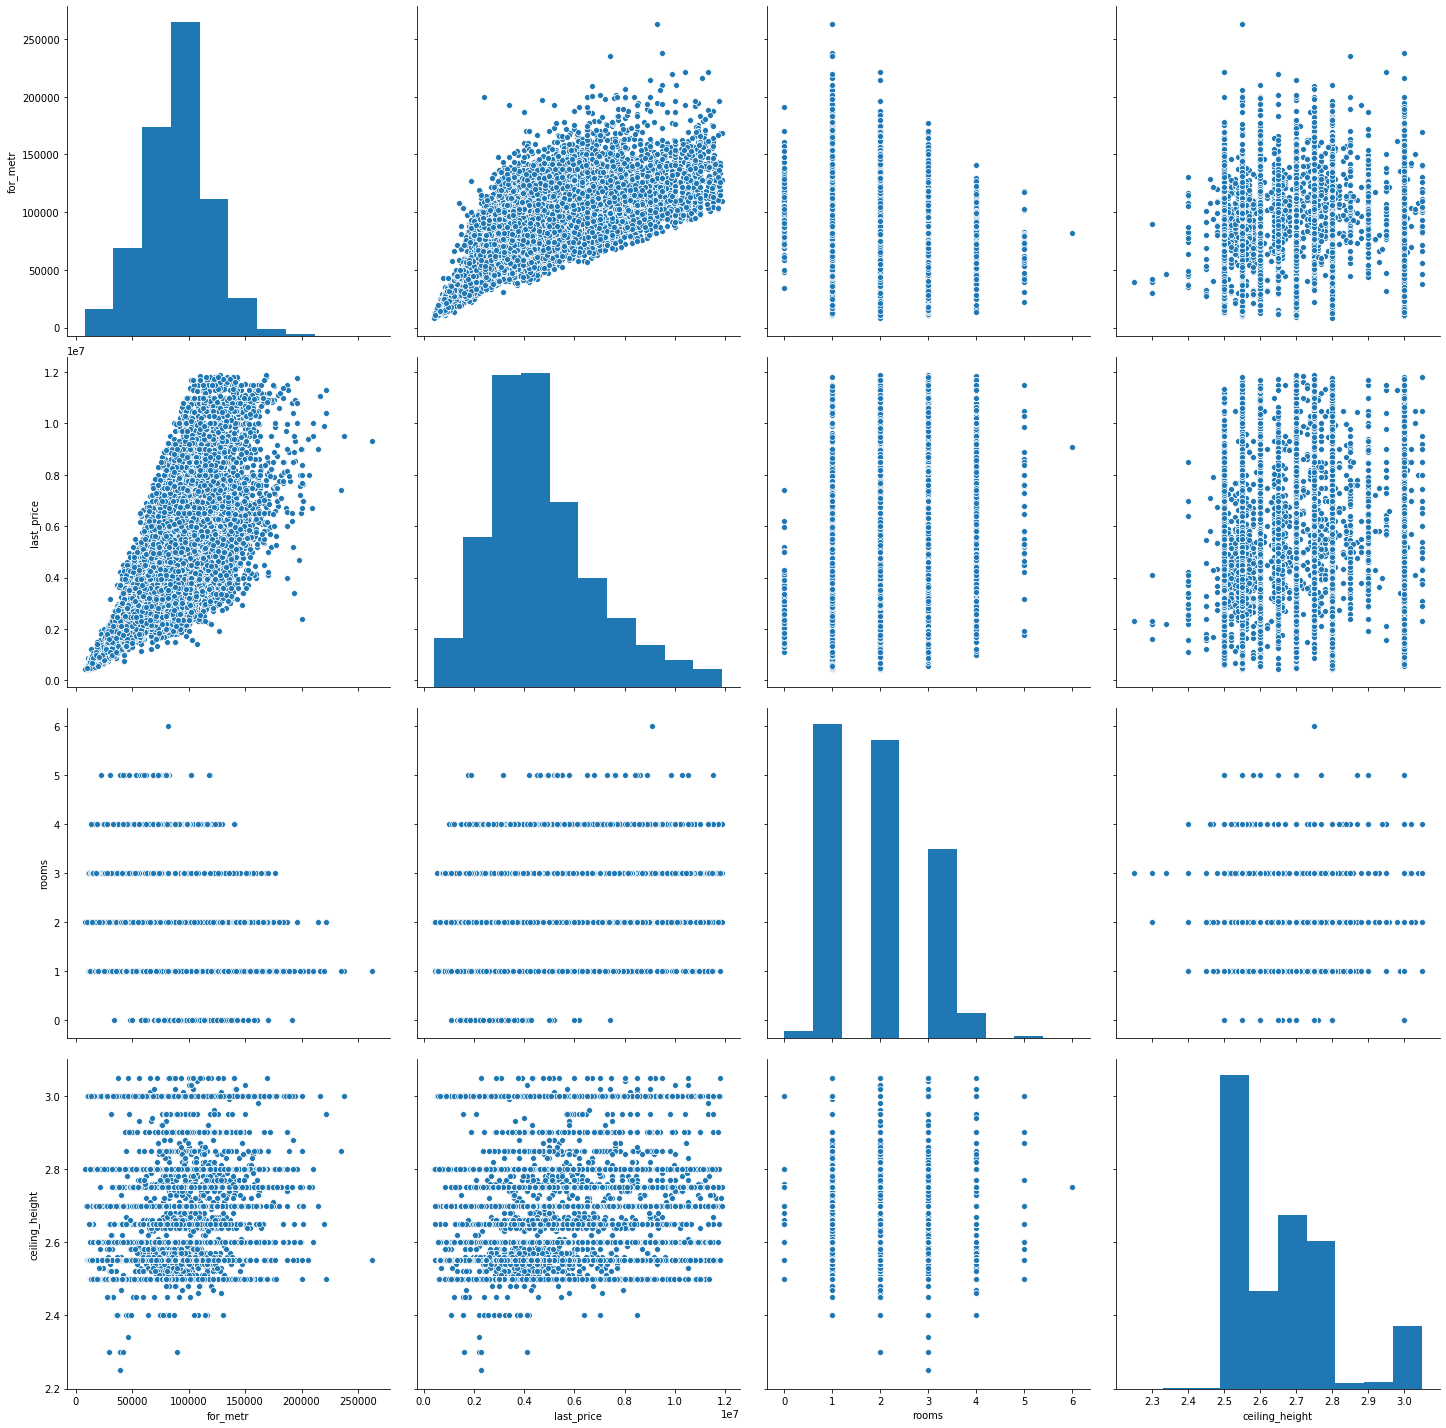

In [55]:
#графики зависимости цены за кв. метр от параметров квартиры 
sns.pairplot(good_data, vars=['for_metr', 'last_price', 'rooms', 'ceiling_height'], height=5)

-0.5251318190105331


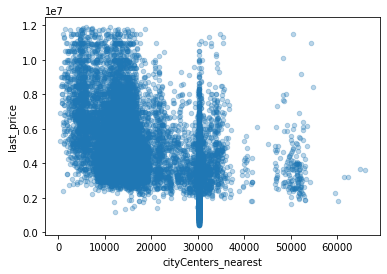

In [56]:
#рассмотрим  зависимость  цены от близости к центру
good_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', alpha=0.3)

print(good_data['cityCenters_nearest'].corr(good_data['last_price'])) 

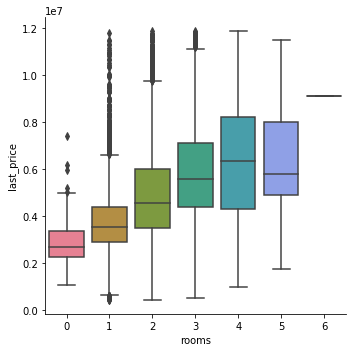

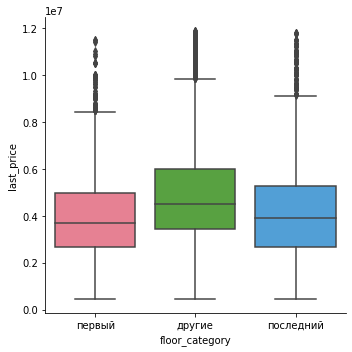

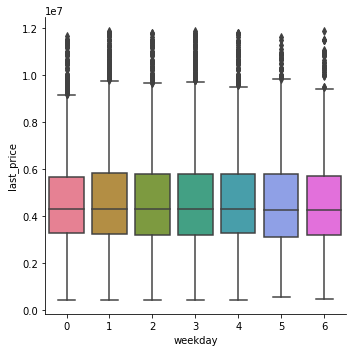

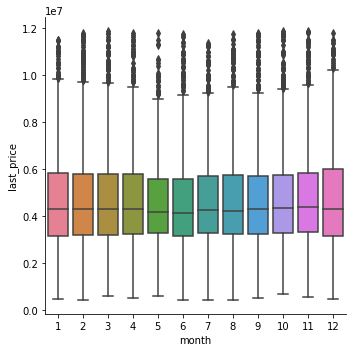

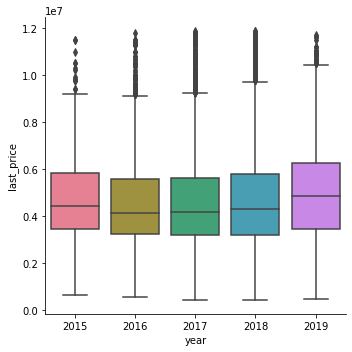

In [57]:
#рассмотрим  зависимость  цены от числа комнат, этажа и времени публикации
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=good_data, palette='husl')

In [58]:
good_data.corr()[['last_price', 'for_metr']]

,last_price,for_metr
total_images,0.171505,0.131504
last_price,1.000000,0.646366
total_area,0.684463,-0.071730
rooms,0.413326,-0.235249
ceiling_height,0.300202,0.225738
floors_total,0.255970,0.379486
living_area,0.520586,-0.181285
floor,0.172540,0.275789
studio,-0.065595,0.041059
open_plan,-0.041432,0.024941


Какие факторы больше всего влияют на стоимость квартиры:
-объективно главная зависимость между стоимостью квартиры за кв метр и ее площадью
коэф корреляции зависимости кв метра и ценой 0,65
-удаленность квартиры от центра города тоже определенно влияет на стоимость квартиры но обратно пропорционально коэфф корреляции -0,52 чем дальше от центра тем дешевле
-стоимость квартиры также напрямую зависит от числа комнат, однако высока вероятность купить 5 комнатную квартиру дешевле 4 комнатной
- еще один фактор влияющий на стоимость квартиры это этаж, самые дешевые квартиры на первом этаже, на последнем можно продать чуть выгоднее, но всеже квартиры на других этажах стоят дороже
-нельзя сказать что день недели или месяц публикации объявления сильно влияют на цену жилья, однако в 2014 году цены жилья были заметно выше по отношению к другим годам

In [59]:
#Выберем 10 населённых пунктов с наибольшим числом объявлений посчитаем среднюю цену квадратного метра в этих населённых пунктах
median_for_metr = good_data.pivot_table(index='locality_name', values='for_metr', aggfunc=['count', 'median'])
median_for_metr.columns = ['count', 'median']

# населённые пункты с самой высокой стоимостью жилья
median_for_metr.sort_values('count', ascending=False).head(10)


,count,median
locality_name,,
санкт-петербург,9271,101695.0
посёлок мурино,375,85714.0
посёлок шушары,345,76316.0
всеволожск,307,65789.0
посёлок парголово,255,91328.0
пушкин,236,97988.5
колпино,233,74138.0
гатчина,222,67417.5
деревня кудрово,218,92225.0


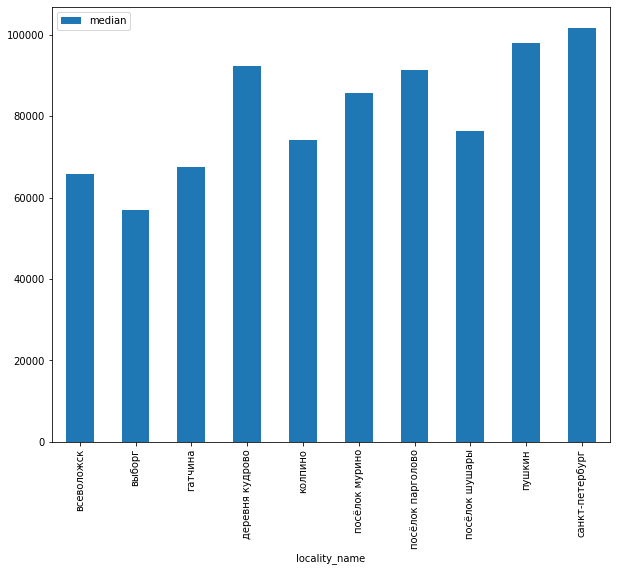

In [60]:
median_for_metr2 = median_for_metr.query('count > 170')
median_for_metr2.plot(y='median', kind = 'bar',  figsize=(10, 8))

In [61]:
# населённые пункты с самой низкой стоимостью жилья
median_for_metr.sort_values('count', ascending=True).head(10)

,count,median
locality_name,,
деревня пикколово,1,53250.0
деревня пустынка,1,27331.0
посёлок плоское,1,20913.0
поселок жилпосёлок,1,32480.0
деревня пижма,1,22642.0
поселок красносельское,1,27419.0
деревня пельгора,1,18269.0
поселок жилгородок,1,54495.0
посёлок белоостров,1,66667.0


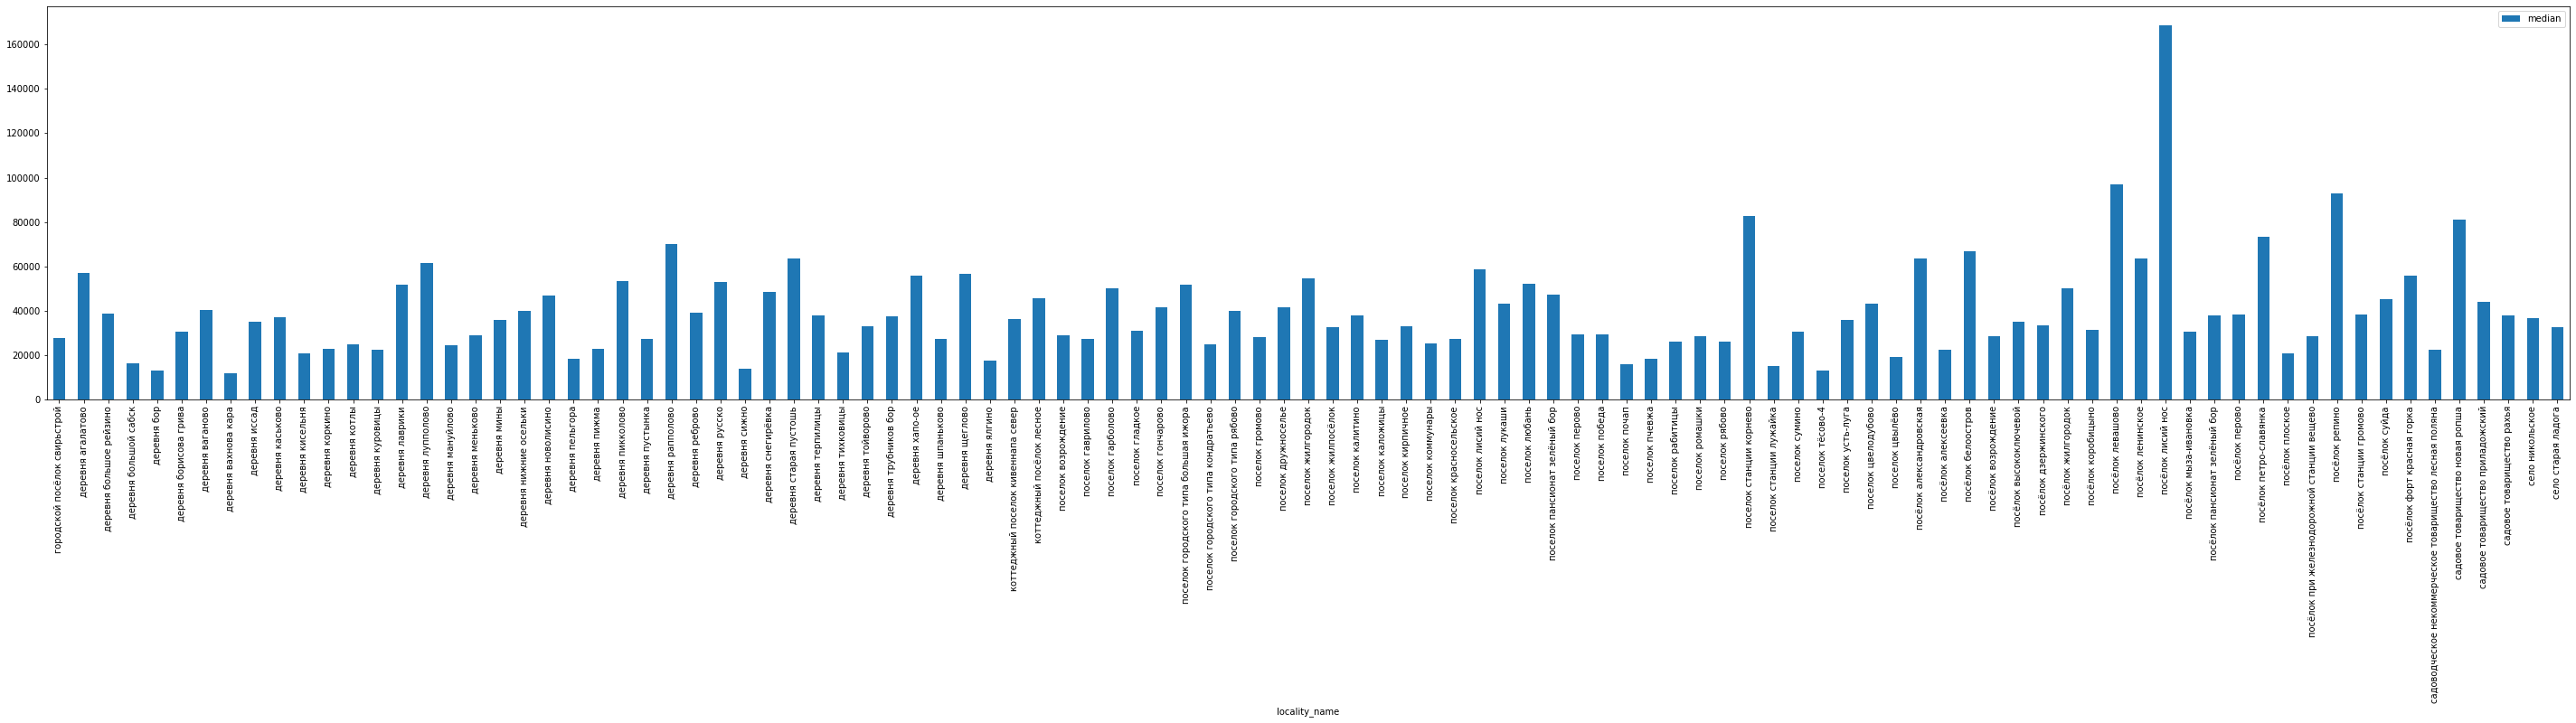

In [62]:
median_for_metro = median_for_metr.query('count < 2')
median_for_metro.plot(y='median', kind = 'bar',  figsize=(50, 8))

вывели график зависимoсти цены от местоположения

Выделите населённые пункты с самой высокой и низкой стоимостью жилья:
конечно лидером стоимости квадратного метра является СПБ, после него идет Пушкин, деревня Кудрово и поселок Парголово
дешевле всего в Ленинградской области можно купить квартиру в деревне Ялгино и поселок Сумино, вероятно они находятся в большом отдалении от больших населенных центров
В глаза бросается цена квадратного метра в деревнях выше чем в городах ЛО, возможно это связано с отдалением от СПБ

cityCenters_nearest_km
0.0     126560.5
1.0     108856.5
2.0     111765.0
3.0     104167.0
4.0     111389.0
5.0     120154.5
6.0     118738.0
7.0     114737.0
8.0     112727.0
9.0     103448.0
10.0    105485.0
11.0    102273.0
12.0    102571.0
13.0    102857.0
14.0    101250.0
15.0    100000.0
16.0     96907.0
17.0     93592.0
18.0     94643.0
19.0     95839.5
20.0    103852.0
21.0     89706.0
22.0     88904.0
23.0     90667.0
24.0     86133.0
25.0     92283.5
26.0     87614.0
27.0     70312.0
28.0     79873.5
29.0     78226.0
Name: for_metr, dtype: float64


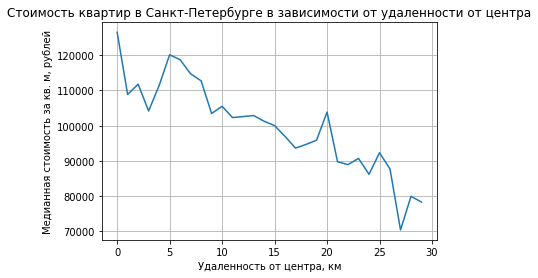

In [63]:
#Выделим квартиры в Санкт-Петербурге
spb = good_data.query('locality_name == "санкт-петербург"').reset_index()
spb['cityCenters_nearest_km'] = spb['cityCenters_nearest'] / 1000
                                   
spb['cityCenters_nearest_km']= spb['cityCenters_nearest_km'].round()
# найдем стоимость квартир в зависимости от удаленности от центра
spb_group_km = spb.groupby('cityCenters_nearest_km')['for_metr'].median()
print(spb_group_km)
plt.plot(spb_group_km)
plt.xlim=10
plt.title('Стоимость квартир в Санкт-Петербурге в зависимости от удаленности от центра')
plt.ylabel('Медианная стоимость за кв. м, рублей')
plt.xlabel('Удаленность от центра, км')
plt.grid()
plt.show()

In [64]:
#выделим центр санкт-петербурга
spb_centr = spb[(spb['cityCenters_nearest_km']<= 8)]
spb_centr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1489 entries, 0 to 9270
Data columns (total 38 columns):
index                     1489 non-null int64
total_images              1489 non-null int64
last_price                1489 non-null float64
total_area                1489 non-null float64
first_day_exposition      1489 non-null datetime64[ns]
rooms                     1489 non-null int64
ceiling_height            1489 non-null float64
floors_total              1489 non-null float64
living_area               1489 non-null float64
floor                     1489 non-null int64
is_apartment              1489 non-null object
studio                    1489 non-null bool
open_plan                 1489 non-null bool
kitchen_area              1478 non-null float64
balcony                   1489 non-null float64
locality_name             1489 non-null object
airports_nearest          1489 non-null float64
cityCenters_nearest       1489 non-null float64
parks_around3000          1489 non-nul

total_area


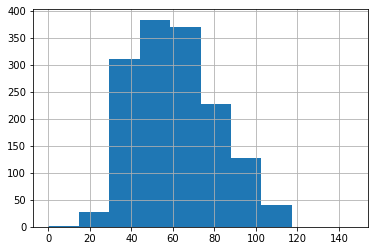

total_area


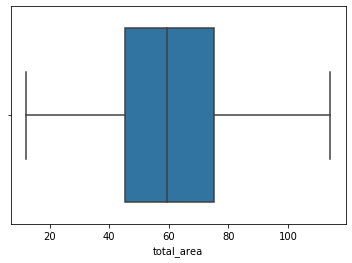

None
last_price


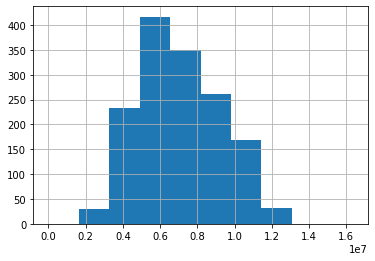

last_price


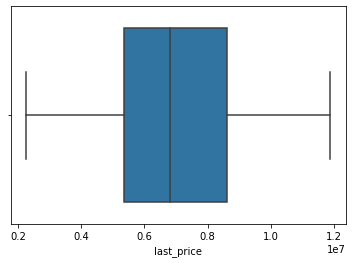

None
rooms


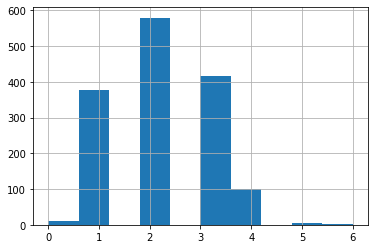

rooms


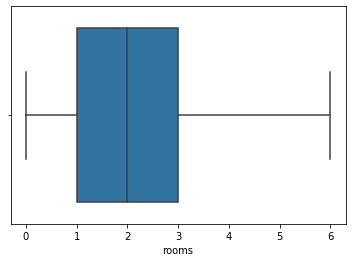

None
ceiling_height


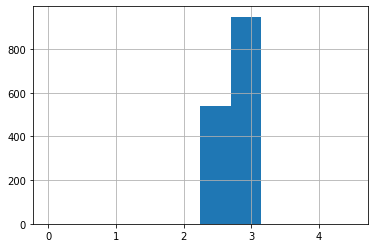

ceiling_height


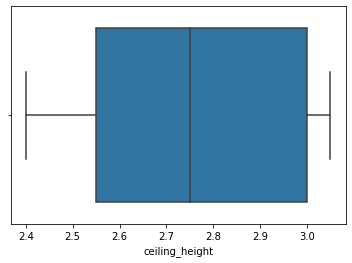

None


In [65]:
# проанализируем данные для квартир в центре санкт-петербурга для списка столбцов площадь, цена, колличество комнат,высота потолков
list = ['total_area', 'last_price', 'rooms', 'ceiling_height']  # создаем список
for item in list:
    def analyz(item):
            print (item)
            percentile_95 = np.percentile(spb_centr[item], 95)
            spb_centr[item].hist(range = (0, percentile_95*1.5))
            plt.show()
            print(item)
            sns.boxplot(spb_centr[item])
            plt.show()
    print(analyz(item))              

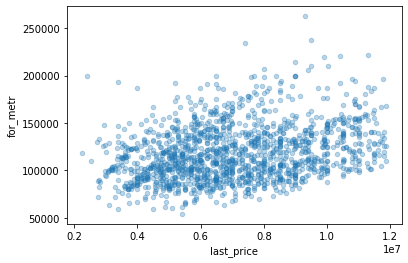

In [66]:
spb_centr.plot(x='last_price', y='for_metr', kind='scatter', alpha=0.3)

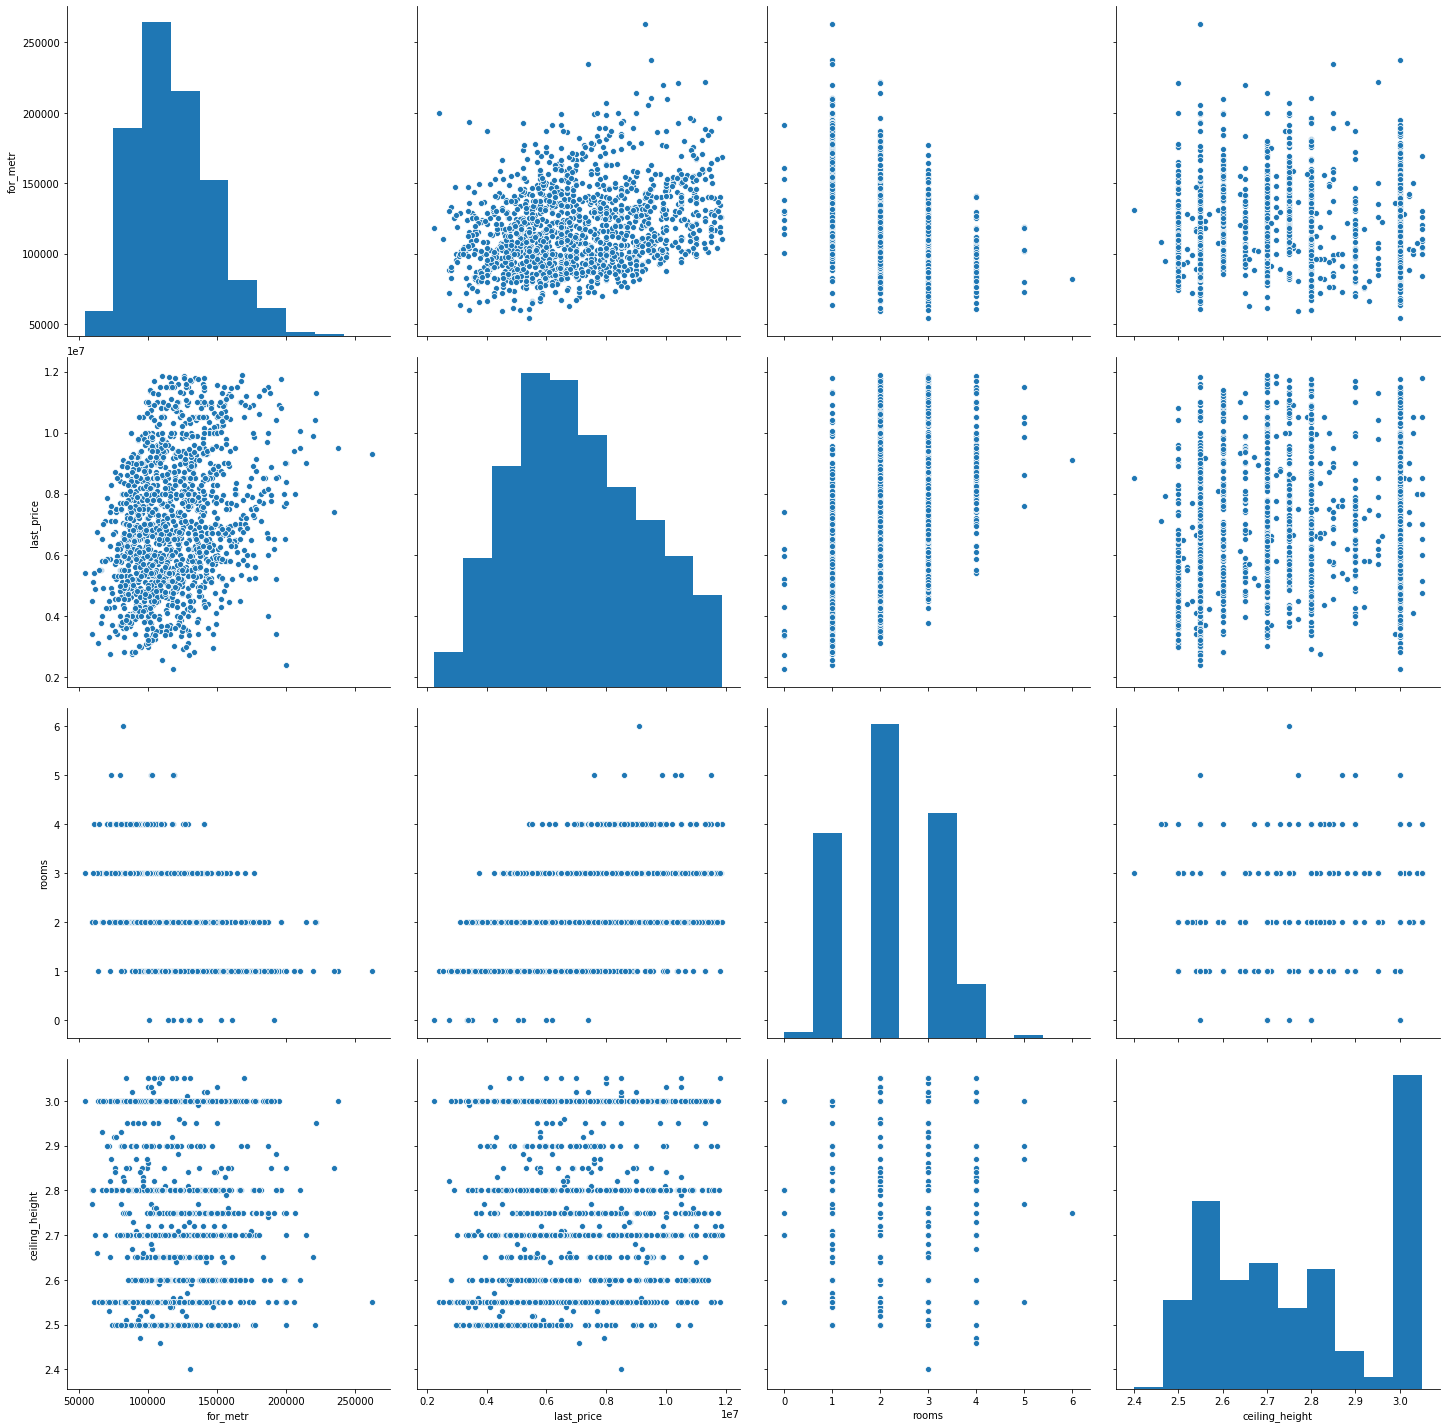

In [67]:
#графики зависимости цены за кв. метр от параметров квартиры 
sns.pairplot(spb_centr, vars=['for_metr', 'last_price', 'rooms', 'ceiling_height'], height=5)

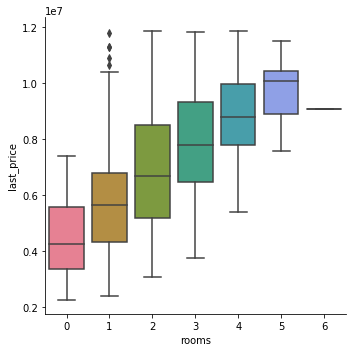

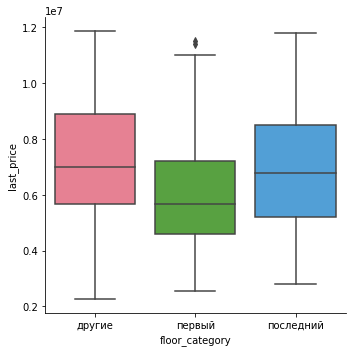

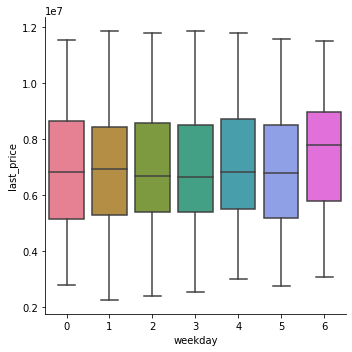

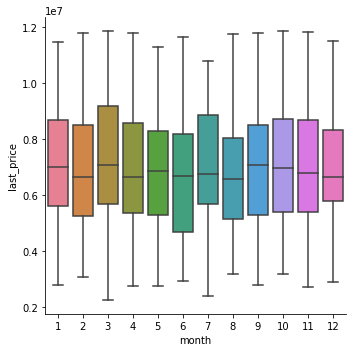

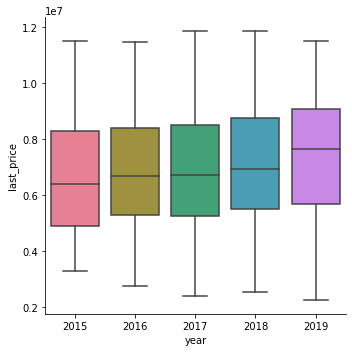

In [68]:
# проанализируем данные для квартир в центре санкт-петербурга для списка столбцов число комнат, этаж, удалённость от центра, дата размещения объявления
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=spb_centr, palette='husl') 

In [69]:
spb_centr.corr()[['last_price', 'for_metr']]

,last_price,for_metr
index,-0.011877,0.024547
total_images,0.103051,0.121501
last_price,1.000000,0.305196
total_area,0.716038,-0.409980
rooms,0.443704,-0.494390
ceiling_height,0.159102,-0.054298
floors_total,0.158114,0.309803
living_area,0.535934,-0.485253
floor,0.167722,0.247737
studio,-0.073353,0.039262


In [70]:
#сравним насколько отличается картина в СП но в отдалении от центра
no_centr_spb = good_data.query('locality_name == "санкт-петербург" and cityCenters_nearest > 8').reset_index()


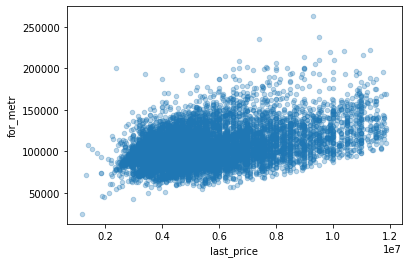

In [71]:
# рассмотрим зависимость цены от  кв метра за пределами центральной части СП но внутри него
no_centr_spb.plot(x='last_price', y='for_metr', kind='scatter', alpha=0.3)

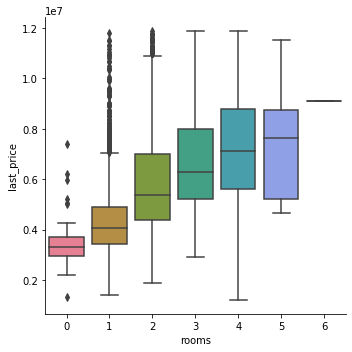

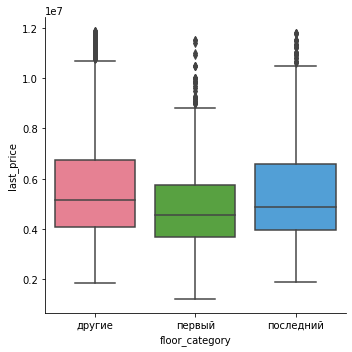

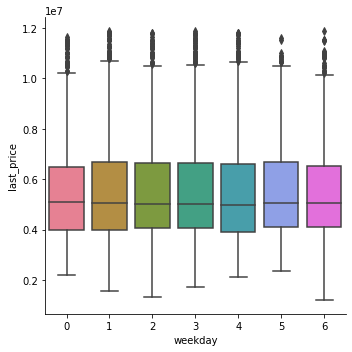

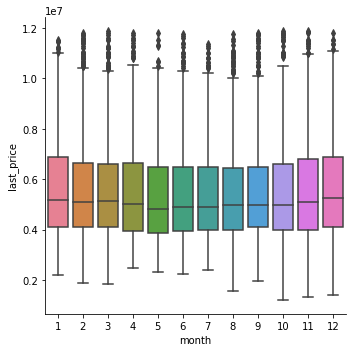

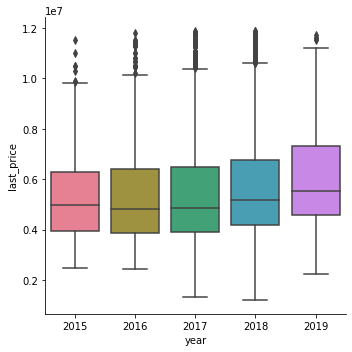

In [72]:
# проанализируем данные для квартир в санкт-петербурге за пределами центрального кольца
for column in ['rooms', 'floor_category', 'weekday', 'month', 'year']:
    sns.catplot(x=column, y="last_price", kind="box", data=no_centr_spb, palette='husl') 

средняя квартира выставленная на продажу в СПБ:
2 комнатная, площадью 60 кв м, с высотой потолка 2,75 и стоимостью 6,8 млн
стоимость квартиры в СПБ зависит от колличества комнат, чем больше комнат тем дороже квартира
самые дешевые квартиры находятся на первом этаже, квартиры находящиеся на последнем этаже немного дешевле чем на других но заметно дороже чем на первом
в среднем квартиры выставленные на продажу в воскресенье продавались немного дороже чем в другие дни недели, та же зависимость и по месяцам- март и июль цены выше
если рассматривать период 2015-2019 то цены с 2016 стабильно растут

Исходя из анализа данных подтверждается предположение о том что цена квартиры зависит от площади и удаленности от центра. немаловажным фактором является этажность где нименьшая цена квадратного метра на первом и последнем этажах. Особо стоит отметить прямую зависимость увеличения стоимости квартиры при увеличении числа комнат но только в центральной части городов. Подобное правило действует в квартирах на значительном удалении от центра при условии колличества комнат не более 4.
Прослеживается влияние макроэкономических факторов на стоимость квадратного метра квартиры что нашло отражение в отсутствии возврата цены квадратного метра до показателей 2014 года. Не оказывает значительного влияния на стоимость предложений квартир ни день недели ни время года размещения объявления.
Слишком долгие(более 3 месяцев) и слишком короткие периоды размещения предложений дают основание полагать о мнимости данных предложений, т е не нацеленных на совершение реальных сделок.
Однако данные предложения не оказали значительного влияния на результаты анализа.


